In [1]:
import numpy as np, matplotlib as plt, pandas as pd, os, sys
from matplotlib import pyplot

In [3]:
## collect data from pickeed dfs

n_sm = 7
lag = 64
n_srvs = 4

x_list = [i+2 for i in range(n_sm)]
y_dict = {'10k-AT': np.zeros((n_sm, 3)),
          '10k-GC': np.zeros((n_sm, 3)),
          'full-AT': np.zeros((n_sm, 3)),
          '1k-AT': np.zeros((n_sm, 3)),
          '1k-GC': np.zeros((n_sm, 3))}  

for file in os.listdir(os.getcwd()):
    
    if 'mdtraj' in file:
          
        df = pd.read_pickle(file)
        train_score, test_score = df['train_test'][1], df['train_test'][2]
        diff_score = train_score  - test_score
        score_list = np.array([train_score, test_score, diff_score])

        if 'trim' in file and '20KL_AT' in file:
            sm = (int(file.replace('trim-10k_sm-', '').replace('_l-64_scaled-mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.pkl', '')))
            y_dict['10k-AT'][x_list.index(sm)] = score_list
            
        elif 'trim' in file and '20KL_GC' in file:
            sm = (int(file.replace('trim-10k_sm-', '').replace('_l-64_scaled-mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.pkl', '')))
            y_dict['10k-GC'][x_list.index(sm)] = score_list
        
        elif 'full-221' in file and '20KL_AT' in file:
            sm = (int(file.replace('full-221_sm-', '').replace('_l-64_scaled-mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.pkl', '')))
            y_dict['full-AT'][x_list.index(sm)] = score_list
            
        elif 'trim' not in file and '20KL_AT' in file:
            sm = (int(file.replace('sm-', '').replace('_l-64_scaled-mdtraj-pwdr-20KL_AT-all_293K-221-10000-190.pkl', '')))
            y_dict['1k-AT'][x_list.index(sm)] = score_list

        elif 'trim' not in file and'20KL_GC' in file:
            sm = (int(file.replace('sm-', '').replace('_l-64_scaled-mdtraj-pwdr-20KL_GC-core_310K-86-10000-190.pkl', '')))
            y_dict['1k-GC'][x_list.index(sm)] = score_list 

        
        else:
            print ('other conditions')

print(y_dict)


{'10k-AT': array([[2.99203253, 2.97041845, 0.02161407],
       [3.98781204, 3.96454382, 0.02326822],
       [4.98142815, 4.93260574, 0.0488224 ],
       [5.97525406, 5.90367317, 0.07158089],
       [6.96282434, 6.74367523, 0.21914911],
       [7.93048334, 7.12376404, 0.8067193 ],
       [8.94160032, 8.66236973, 0.27923059]]), '10k-GC': array([[2.96683288, 2.39985979, 0.56697309],
       [3.917274  , 3.17443538, 0.74283862],
       [4.90805078, 2.73516214, 2.17288864],
       [5.79929352, 3.85872769, 1.94056582],
       [6.6350956 , 4.44152474, 2.19357085],
       [7.53027439, 4.53563571, 2.99463868],
       [8.5886941 , 4.5878861 , 4.000808  ]]), 'full-AT': array([[2.99208927, 2.97677886, 0.01531041],
       [3.988168  , 3.96396637, 0.02420163],
       [4.9804163 , 4.94634771, 0.03406858],
       [5.97308922, 5.93164825, 0.04144096],
       [6.96390343, 6.83387566, 0.13002777],
       [7.94860649, 7.76172447, 0.18688202],
       [8.92550802, 8.37173748, 0.55377054]]), '1k-AT': array([[

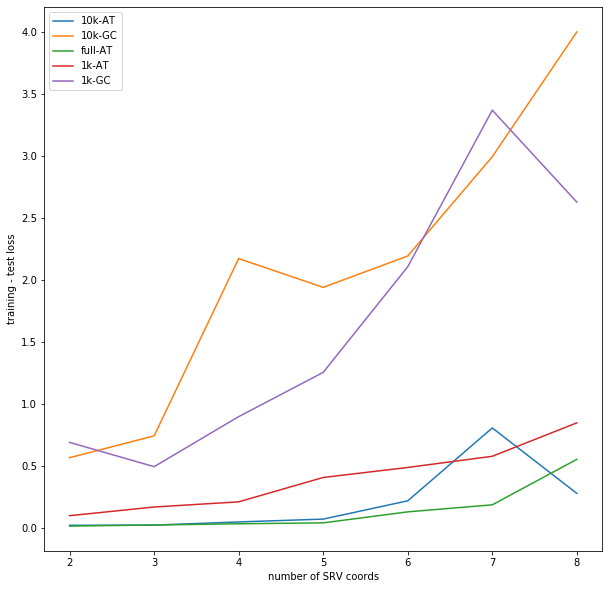

In [4]:
## makes plots

fig, ax = plt.pyplot.subplots(figsize=(10, 10))

for j, key in enumerate(y_dict):

    y_list = y_dict[key][:, 2]
    ax.plot(x_list, y_list, label=key)

ax.set_xlabel('number of SRV coords')
ax.set_ylabel('training - test loss')
ax.legend()